In [200]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib



from sklearn.model_selection import train_test_split


from numpy import array
from sklearn.metrics import confusion_matrix

from sklearn import metrics


## Data Reading

In [201]:
bike_df=pd.read_csv(r"C:\Users\tejas\Downloads\archive (3)\Used_Bikes.csv")

In [202]:
bike_df.head().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,0,1,2,3,4
bike_name,TVS Star City Plus Dual Tone 110cc,Royal Enfield Classic 350cc,Triumph Daytona 675R,TVS Apache RTR 180cc,Yamaha FZ S V 2.0 150cc-Ltd. Edition
price,35000.000000,119900.000000,600000.000000,65000.000000,80000.000000
city,Ahmedabad,Delhi,Delhi,Bangalore,Bangalore
kms_driven,17654.000000,11000.000000,110.000000,16329.000000,10000.000000
owner,First Owner,First Owner,First Owner,First Owner,First Owner
age,3.000000,4.000000,8.000000,4.000000,3.000000
power,110.000000,350.000000,675.000000,180.000000,150.000000
brand,TVS,Royal Enfield,Triumph,TVS,Yamaha


In [203]:
bike_df.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
price,32648.000000,68295.417637,90718.595205,4400.000000,25000.000000,43000.000000,80000.000000,1900000.000000
kms_driven,32648.000000,26344.625184,22208.527695,1.000000,12000.000000,20373.000000,35000.000000,750000.000000
age,32648.000000,8.048211,4.031700,1.000000,5.000000,7.000000,10.000000,63.000000
power,32648.000000,213.511302,134.428868,100.000000,150.000000,150.000000,220.000000,1800.000000


1)__How Many Bike is Available in Data set
==>Total No Of Bike Available is 32648
2)How Many different Categories of Bike Available in Data 
==>Total 471 different bike Available
3)How Many Type Of Bike Manufacturing Company is available
==>Total 23 Manufacturing Company IS available
4)Which bike is available in Maximum Quantity
__Bajaj Pulsar 150cc Quantity is 2776
5)Type Of the Bike Owner is What  
__ First Owner
     Second Owner
     Third Owner
      Fourth Owner Or More
6)The Bike Is How Much Old 
__Average age of bike is 8 year 
__Minimum age is 1 year
__Maximum age is 63 year
7)The  Kilometer driven by Bike is how much.
__Average Kilometer Completed by bike is 26344 Km
__Minimum Kilometer Completed by bike is 1
__Maximum Kilometer Completed by bike is 750000
8)Engine of bike is how many CC.
__Average Power of Engine is 213CC
__Maximum Power of Bike is 1800CC
__Minimum Power of Bike is 100CC
9)Price Range Of Bike Is What.
__maximum price of bike is 19lakh
__minimum price of bike is 4400
11)most of the bike from which city
__Delhi=7318


## Data Cleaning

In [204]:
bike_df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [205]:
bike_df=bike_df.drop('city',axis=1)
bike_df.head(5).T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,0,1,2,3,4
bike_name,TVS Star City Plus Dual Tone 110cc,Royal Enfield Classic 350cc,Triumph Daytona 675R,TVS Apache RTR 180cc,Yamaha FZ S V 2.0 150cc-Ltd. Edition
price,35000.000000,119900.000000,600000.000000,65000.000000,80000.000000
kms_driven,17654.000000,11000.000000,110.000000,16329.000000,10000.000000
owner,First Owner,First Owner,First Owner,First Owner,First Owner
age,3.000000,4.000000,8.000000,4.000000,3.000000
power,110.000000,350.000000,675.000000,180.000000,150.000000
brand,TVS,Royal Enfield,Triumph,TVS,Yamaha


We Don't Need city columns so we can removed it


In [206]:
#bike_df["power"].unique()

In [207]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   kms_driven  32648 non-null  float64
 3   owner       32648 non-null  object 
 4   age         32648 non-null  float64
 5   power       32648 non-null  float64
 6   brand       32648 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [208]:
bike_df["bike_name"]=bike_df["bike_name"].str.split(" ").str.slice(0,3).str.join(" ")
bike_df.head(5).T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,0,1,2,3,4
bike_name,TVS Star City,Royal Enfield Classic,Triumph Daytona 675R,TVS Apache RTR,Yamaha FZ S
price,35000.000000,119900.000000,600000.000000,65000.000000,80000.000000
kms_driven,17654.000000,11000.000000,110.000000,16329.000000,10000.000000
owner,First Owner,First Owner,First Owner,First Owner,First Owner
age,3.000000,4.000000,8.000000,4.000000,3.000000
power,110.000000,350.000000,675.000000,180.000000,150.000000
brand,TVS,Royal Enfield,Triumph,TVS,Yamaha


In bike Name Power of bike also mention there so we don't need to it so we remove it .
we use here string and split for removing 

In [209]:
bike_df["owner"].replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth Owner Or More':4},inplace=True)
bike_df["owner"]=bike_df["owner"].astype(int)


Owner Columns type is object we need to convert it into numerical
we replace all the value with 1,2,3,4 and 
convert into integer

In [210]:
backup=bike_df.copy()
#backup

In [211]:
#bike_df.city.unique()
#bike_df["bike_name"].unique()
#bike_df.owner.unique()
#bike_df.brand.unique()

In [212]:
bike_df["power"]=bike_df["power"].astype(int)
bike_df["age"]=bike_df["age"].astype(int)
bike_df["kms_driven"]=bike_df["kms_driven"].astype(int)
bike_df["price"]=bike_df["price"].astype(int)



all float columns are converted into integer 

In [213]:
bike_df=bike_df[bike_df["price"]<500000].reset_index(drop=True)
bike_df

,bike_name,price,kms_driven,owner,age,power,brand
0,TVS Star City,35000,17654,1,3,110,TVS
1,Royal Enfield Classic,119900,11000,1,4,350,Royal Enfield
2,TVS Apache RTR,65000,16329,1,4,180,TVS
3,Yamaha FZ S,80000,10000,1,3,150,Yamaha
4,Yamaha FZs 150cc,53499,25000,1,6,150,Yamaha
...,...,...,...,...,...,...,...
32490,Hero Passion Pro,39000,22000,1,4,100,Hero
32491,TVS Apache RTR,30000,6639,1,9,180,TVS
32492,Bajaj Avenger Street,60000,20373,1,6,220,Bajaj
32493,Hero Super Splendor,15600,84186,1,16,125,Hero


In [214]:
bike_df.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
price,32495.000000,64789.272134,72283.134431,4400.000000,25000.000000,43000.000000,80000.000000,499000.000000
kms_driven,32495.000000,26431.217018,22219.000143,1.000000,12000.000000,20373.000000,35000.000000,750000.000000
owner,32495.000000,1.086013,0.295355,1.000000,1.000000,1.000000,1.000000,4.000000
age,32495.000000,8.064687,4.031192,1.000000,5.000000,7.000000,10.000000,63.000000
power,32495.000000,210.227758,124.850507,100.000000,150.000000,150.000000,220.000000,883.000000


In [215]:
#bike_df.city.value_counts()
bike_df.count()

bike_name     32495
price         32495
kms_driven    32495
owner         32495
age           32495
power         32495
brand         32495
dtype: int64

In [216]:
print(bike_df.price.max())
print(bike_df.price.min())

499000
4400


# Visualization 


In [217]:
a=bike_df["owner"].value_counts()

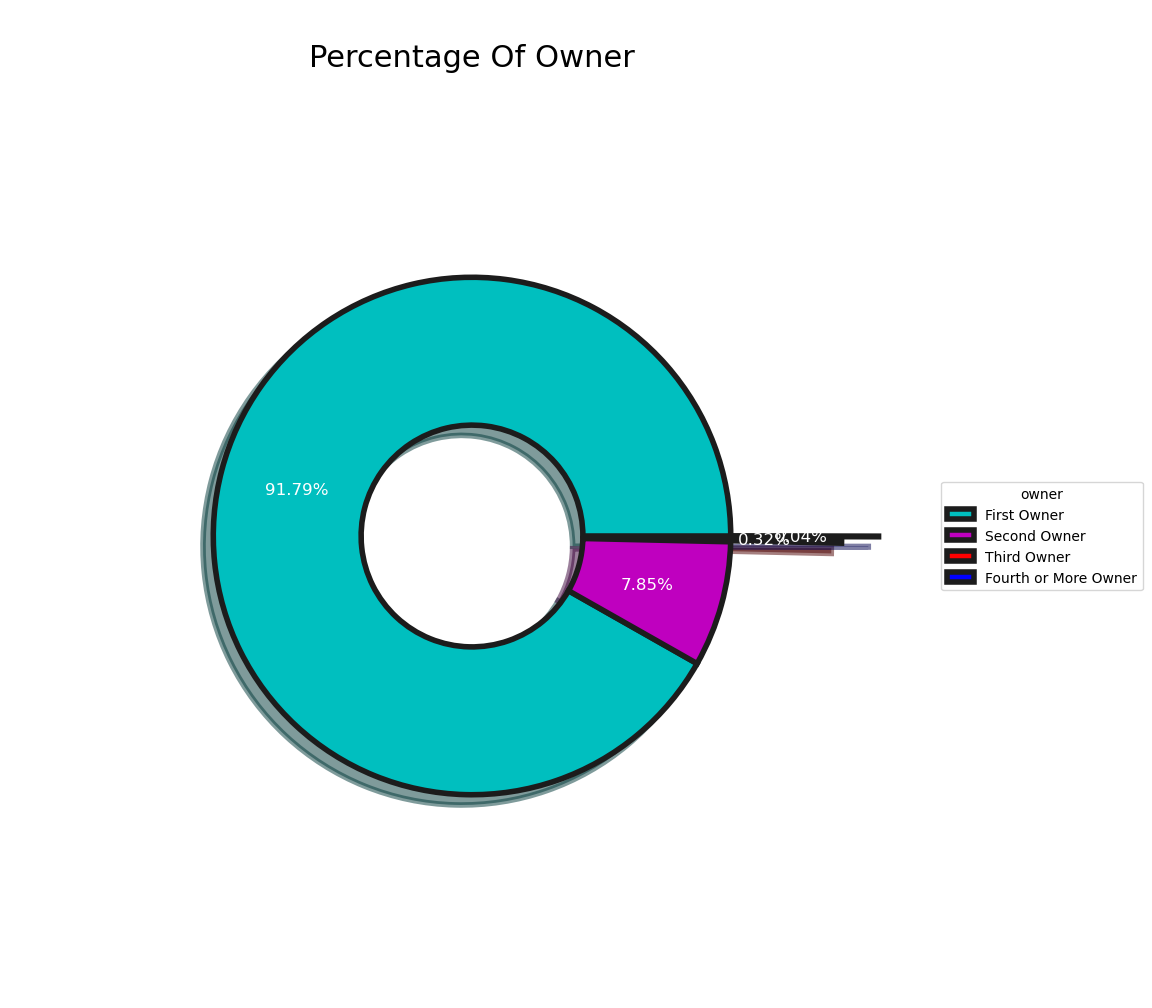

In [218]:
plt.subplots(figsize=(12, 12))

activities = ['First Owner','Second Owner','Third Owner','Fourth or More Owner']
size = 0.4
cols = ['c','m','r','b']

wedges, texts, autotexts = plt.pie(a,
                                  explode=(0,0,0.3,0.4),
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=cols,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, activities, title='owner', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nPercentage Of Owner', fontsize=22)
plt.show()

This Pie Chart Show Us Percentage Of Owner Category


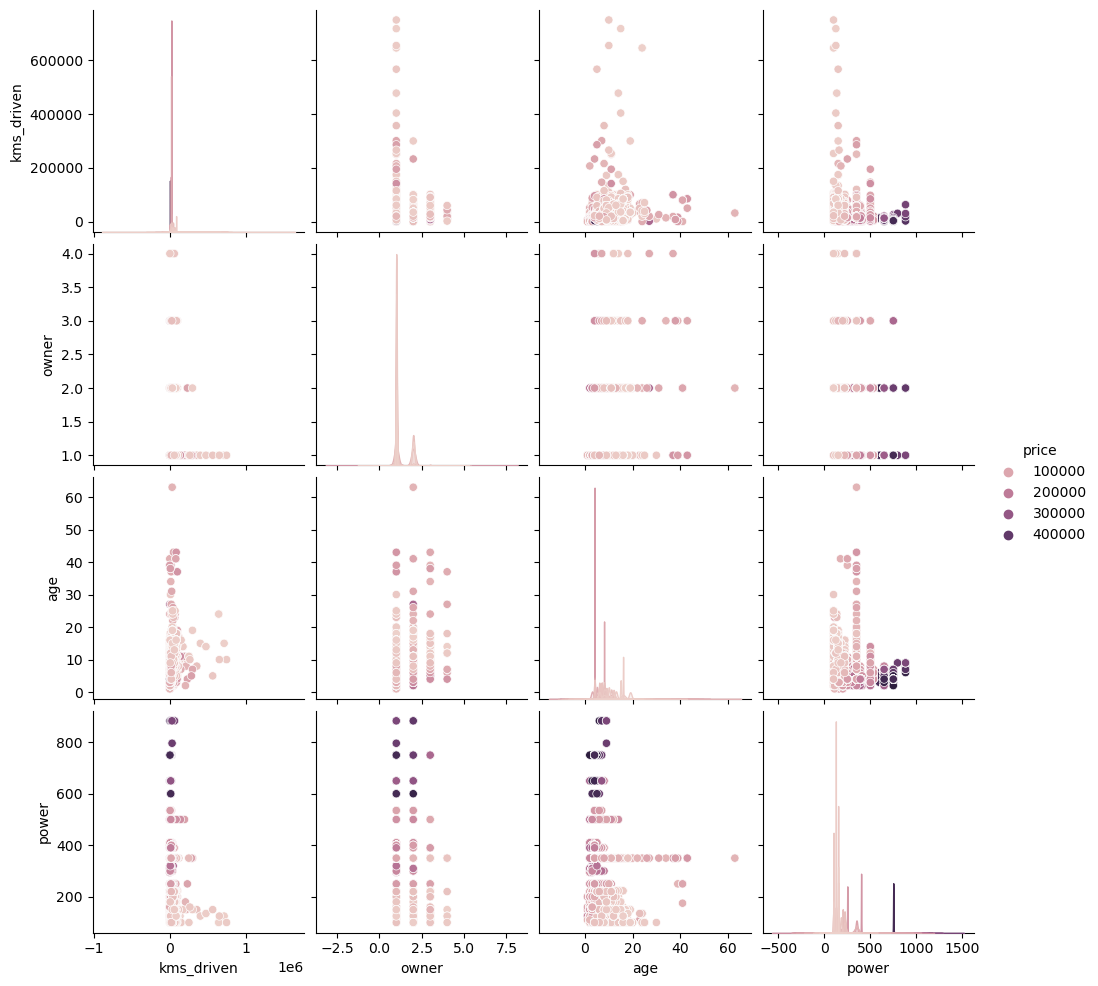

In [219]:
sns.pairplot(data=bike_df,hue="price")

pairplot show us detail about all the columns and its also show outlier values

In [220]:
bike_df.head(5)

,bike_name,price,kms_driven,owner,age,power,brand
0,TVS Star City,35000,17654,1,3,110,TVS
1,Royal Enfield Classic,119900,11000,1,4,350,Royal Enfield
2,TVS Apache RTR,65000,16329,1,4,180,TVS
3,Yamaha FZ S,80000,10000,1,3,150,Yamaha
4,Yamaha FZs 150cc,53499,25000,1,6,150,Yamaha


<Axes: >

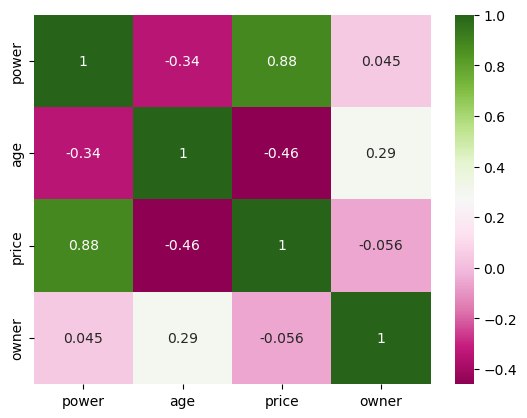

In [221]:
co=bike_df[["power","age","price","owner",]].corr()
sns.heatmap(co,cmap="PiYG",annot=True)

In [222]:
bike_df["brand"].nunique()

20

In [223]:
#matplotlib.colors.cnames.items()

In [224]:
bike_df["brand"].unique()

array(['TVS', 'Royal Enfield', 'Yamaha', 'Honda', 'Hero', 'Bajaj',
       'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki', 'Hyosung',
       'Harley-Davidson', 'Jawa', 'BMW', 'Rajdoot', 'Ducati', 'LML',
       'Yezdi', 'Ideal'], dtype=object)

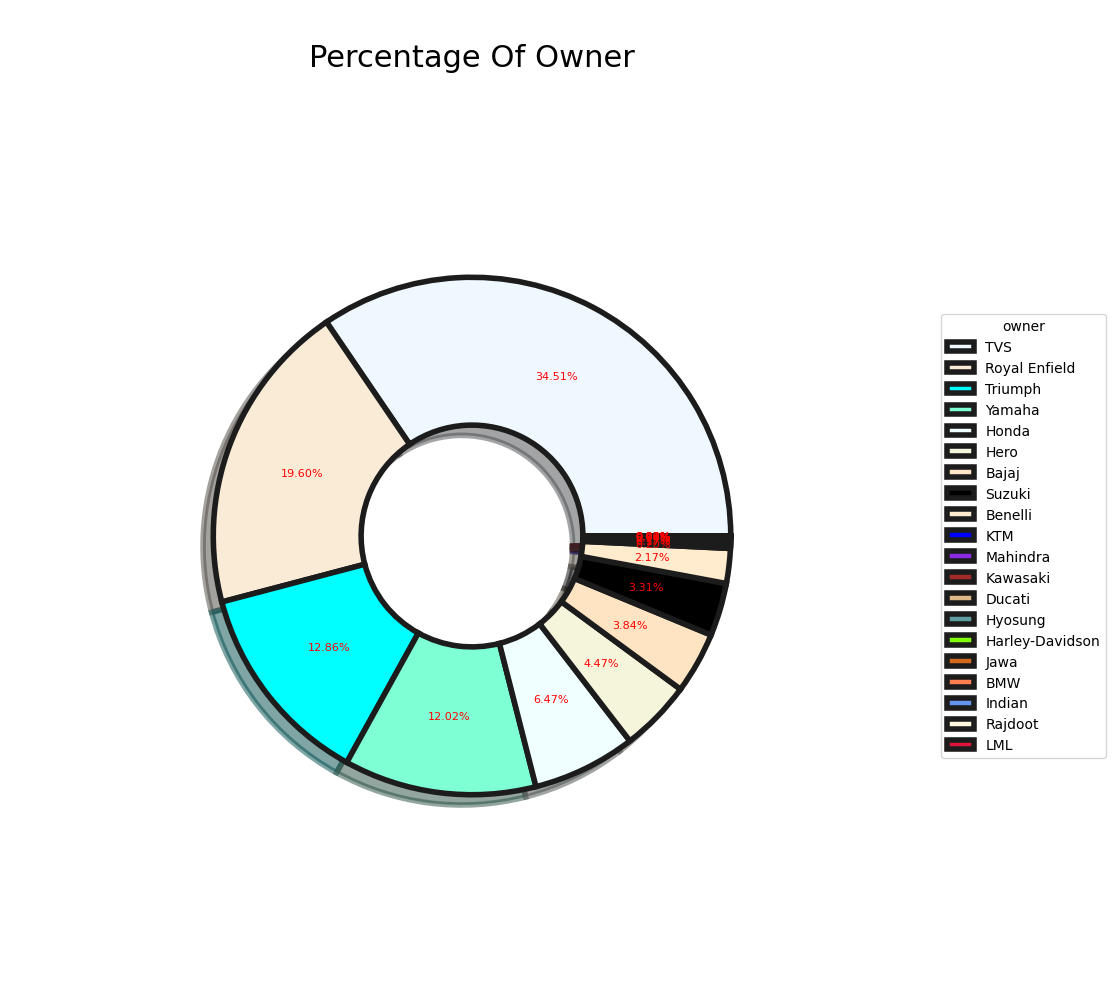

In [225]:
plt.subplots(figsize=(12, 12))

activities = ['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal']
size = 0.4
cols =['aliceblue', 'antiquewhite','aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','#DC143C', '#00FFFF', '#00008B','darkcyan']

wedges, texts, autotexts = plt.pie(bike_df["brand"].value_counts(),
                                  #explode=(0,0,0.3,0.4),
                                 
                                textprops = {'fontsize':8, 'c':'r'},
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=cols,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, activities, title='owner', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nPercentage Of Owner', fontsize=22)
plt.show()

<Axes: >

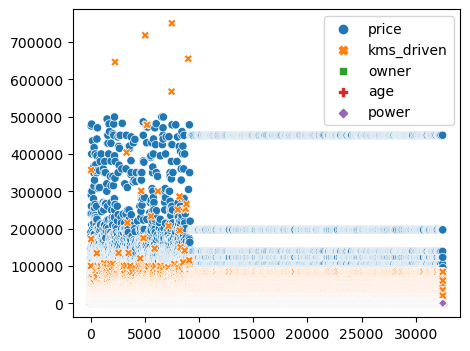

In [226]:
plt.figure(figsize=(5,4))
sns.scatterplot(bike_df)

In [227]:


#plt.bar(x=bike_df["brand"].unique(),height=bike_df["owner"].range(20))


In [228]:
bike_df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3905
Honda               2102
Suzuki              1451
TVS                 1247
KTM                 1076
Harley-Davidson      706
Hyosung               64
Mahindra              55
Kawasaki              54
Benelli               47
BMW                   12
Jawa                  10
Ducati                 2
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

In [229]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32495 entries, 0 to 32494
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32495 non-null  object
 1   price       32495 non-null  int32 
 2   kms_driven  32495 non-null  int32 
 3   owner       32495 non-null  int32 
 4   age         32495 non-null  int32 
 5   power       32495 non-null  int32 
 6   brand       32495 non-null  object
dtypes: int32(5), object(2)
memory usage: 1.1+ MB


In [230]:
#from statsmodels.stats import weightstats
#import scipy.stats as stats


In [231]:
#p=bike_df["power"].mean()
#sample=bike_df["power"].sample(30)
#s=sample
#print("mean",p)
#print("Sample",s)

In [232]:
#Ho="Average of Population is Same With Sample of Population"
#H1="Average of Population is Same With Sample of Population"

In [233]:
#T_Statistics,P_value=weightstats.ztest(s,value=210)


In [234]:
#if P_value <0.05:
    #print("Reject Null",H1)
#else:
   # print("Accept Null",Ho )
#print("T_Statistics ::",T_Statistics)
#print("P_value ::",P_value)

In [235]:
#age=bike_df["age"].mean()
#age_sample=bike_df["age"].sample(30)
#print(age)
#print(age_sample)

In [236]:
#Ho="Mean of Population is Same With Sample of Population"
#H1="Mean of Population is Same With Sample of Population"

In [237]:
#T_Statistics,P_value=weightstats.ztest(age_sample,value=210)


In [238]:
#if P_value <0.05:
    #print("Reject Null",H1)
#else:
    #print("Accept Null",Ho )
#print("T_Statistics ::",T_Statistics)
#print("P_value ::",P_value)

In [239]:
#sample1=bike_df[bike_df["age"]==10]
#sample2=bike_df[bike_df["power"]==250]

In [240]:
#stats.ttest_1samp(sample1,sample2)

# Machine Learning Alogoritham

In [285]:
#feature_cols=[ 'bike_name','kms_driven', 'owner', 'age', 'power', 'brand']
X=bike_df.drop(columns="price")
y=bike_df["price"]

###### creating X and Y varibal 
In we have taken all the Columns Except price in X 
in y we have taken only price 

###### Dependant Varibale Is Price 

###### price is a continous data so we used Supervised Machine Learning Regressor Algoritham

In [286]:

from sklearn.model_selection import train_test_split

In [287]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [288]:
#x_train=pd.get_dummies(x_train)
#x_train.value_counts()

In [289]:
print(x_train.shape)#,
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22746, 6)
(9749, 6)
(22746,)
(9749,)


######  categorical data is two type  Nominal and ordinal

In [290]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In our data bike_name and brand columns have categrical data we can't pass it directly to our model 

to pass the categrical data in model we are using oneHotEncoder 

In [291]:
one_hot=OneHotEncoder()
one_hot.fit(X[["bike_name","brand"]])


OneHotEncoder()

In [292]:
transform=make_column_transformer((OneHotEncoder(categories=one_hot.categories_),["bike_name","brand"]),
                             remainder="passthrough")

###  LinearRegression

In [293]:
from sklearn.linear_model import LinearRegression

In [294]:
linReg=LinearRegression()


In [295]:
pipe_line=make_pipeline(transform,linReg)

In [296]:
pipe_line.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW G 310', 'Bajaj  Pulsar', 'Bajaj Avenger 150cc',
       'Bajaj Avenger 180cc', 'Bajaj Avenger 200cc',
       'Bajaj Avenger 220cc', 'Bajaj Avenger Cruise',
       'Bajaj Avenger Street', 'Bajaj Boxer AT100', 'Bajaj Boxer BM150',
       'Bajaj Boxer CT100', 'Bajaj C...
       'Yamaha YZF-R15 2.0', 'Yamaha YZF-R15 S', 'Yamaha YZF-R15 V3',
       'Yamaha YZF-R3 320cc', 'Yezdi Classic 250cc'], dtype=object),
                                                                            array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'Ideal', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki', 'TVS', 'Yamaha',
       'Yezdi'], dtype=object)]),
                                                  ['bike_name', 'brand'])])),
                ('linearregression', LinearRegression())])

In [297]:
y_pred=pipe_line.predict(x_test)

In [298]:
y_pred

array([ 17842.25414687, 134722.45431416,  61195.4938978 , ...,
        94419.54836184,  33324.20623161,  13663.01624819])

In [299]:
#bike_df["bike_name"].unique()

In [302]:
metrics.r2_score(y_test, y_pred)

0.9598471583421403

## DecisionTreeRegressor 

In [303]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=0,splitter='best')



In [304]:
pipe_line2=make_pipeline(transform,clf)

In [305]:
#pipe_line=make_pipeline(transform,clf)
pipe_line2.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW G 310', 'Bajaj  Pulsar', 'Bajaj Avenger 150cc',
       'Bajaj Avenger 180cc', 'Bajaj Avenger 200cc',
       'Bajaj Avenger 220cc', 'Bajaj Avenger Cruise',
       'Bajaj Avenger Street', 'Bajaj Boxer AT100', 'Bajaj Boxer BM150',
       'Bajaj Boxer CT100', 'Bajaj C...
       'Yamaha YZF-R3 320cc', 'Yezdi Classic 250cc'], dtype=object),
                                                                            array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'Ideal', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki', 'TVS', 'Yamaha',
       'Yezdi'], dtype=object)]),
                                                  ['bike_name', 'brand'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [306]:
Y_pred=pipe_line2.predict(x_test)

In [307]:
metrics.r2_score(y_test, Y_pred)

0.9868065908024952

In [308]:
bike_df.columns

Index(['bike_name', 'price', 'kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')

In [267]:
#bike_df.bike_name.unique()

## KNeighborsRegressor

In [309]:
from sklearn.neighbors import KNeighborsRegressor

In [310]:
KNN=KNeighborsRegressor()

In [311]:
KNN

KNeighborsRegressor()

In [312]:
pipe=make_pipeline(transform,KNN)

In [313]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW G 310', 'Bajaj  Pulsar', 'Bajaj Avenger 150cc',
       'Bajaj Avenger 180cc', 'Bajaj Avenger 200cc',
       'Bajaj Avenger 220cc', 'Bajaj Avenger Cruise',
       'Bajaj Avenger Street', 'Bajaj Boxer AT100', 'Bajaj Boxer BM150',
       'Bajaj Boxer CT100', 'Bajaj C...
       'Yamaha YZF-R15 2.0', 'Yamaha YZF-R15 S', 'Yamaha YZF-R15 V3',
       'Yamaha YZF-R3 320cc', 'Yezdi Classic 250cc'], dtype=object),
                                                                            array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'Ideal', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki', 'TVS', 'Yamaha',
       'Yezdi'], dtype=object)]),
                                                  ['bike_name', 'brand'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [314]:
pred=pipe.predict(x_test)

In [315]:
pred

array([ 18000., 118400.,  21601., ...,  87000.,  25000.,  15600.])

In [316]:
metrics.r2_score(y_test,pred)

0.9389101208521197

## RandomForestRegressor

In [317]:
from sklearn.ensemble import RandomForestRegressor

In [318]:
random=RandomForestRegressor()

In [319]:
pipe_line4=make_pipeline(transform,random)

In [320]:
pipe_line4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW G 310', 'Bajaj  Pulsar', 'Bajaj Avenger 150cc',
       'Bajaj Avenger 180cc', 'Bajaj Avenger 200cc',
       'Bajaj Avenger 220cc', 'Bajaj Avenger Cruise',
       'Bajaj Avenger Street', 'Bajaj Boxer AT100', 'Bajaj Boxer BM150',
       'Bajaj Boxer CT100', 'Bajaj C...
       'Yamaha YZF-R15 2.0', 'Yamaha YZF-R15 S', 'Yamaha YZF-R15 V3',
       'Yamaha YZF-R3 320cc', 'Yezdi Classic 250cc'], dtype=object),
                                                                            array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'Ideal', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki', 'TVS', 'Yamaha',
       'Yezdi'], dtype=object)]),
                                                  ['bike_name', 'brand'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [321]:
Y_PRED=pipe_line4.predict(x_test)

In [322]:
metrics.r2_score(y_test,Y_PRED)

0.9906548341530346

In [325]:
pipe_line4.predict(pd.DataFrame([["TVS Star City",150000,1,5,150,"TVS"]],
                         columns=[ 'bike_name','kms_driven', 'owner', 'age', 'power', 'brand']))

array([41674.13])

In [ ]:
this project helps us on price prediction on there featurr

In [324]:
pickle.dump(pipe_line4,open("RandomForestRegressor.pkl","wb"))

In [282]:
import pickle 